# Lab 2 : Deep Learning : OO Programmation d'un neurone artificiel 

Class decorator. Adds all methods and members from the wrapped class to main_class

    Args:
    - main_class: class to which to append members. Defaults to the class with the same name as the wrapped class
    - exclude: black-list of members which should not be copied

In [1]:
import functools
def update_class(
    main_class=None, exclude=("__module__", "__name__", "__dict__", "__weakref__")
):
    """Class decorator. Adds all methods and members from the wrapped class to main_class

    Args:
    - main_class: class to which to append members. Defaults to the class with the same name as the wrapped class
    - exclude: black-list of members which should not be copied
    """

    def decorates(main_class, exclude, appended_class):
        if main_class is None:
            main_class = globals()[appended_class.__name__]
        for k, v in appended_class.__dict__.items():
            if k not in exclude:
                setattr(main_class, k, v)
        return main_class

    return functools.partial(decorates, main_class, exclude)

La classe artificial_neuron, ce qui caractérise un neurone artificiel, ce sont ses paramètres. Nous allons initialiser $W$ qui sont les coefficient et $b$ qui est le biais. On va aussi faire passer en paramètre, le nombre d'itération et le learning_rate. Pour info, en général, le n_iter = 1000 ou 10000 et le learning_rate est égale à 0.01.

L' erreur est aussi un attribut de notre neurone.

In [2]:
class artificial_neuron:
    def __init__(self, n_iter=100, learning_rate=0.1):
        self.coef_ = None # W
        self.bias_ = None # b
        self.n_iter_ = n_iter
        self.learning_rate_ = learning_rate
        self.loss_ = []

On va définir une méthode predict_proba() pour l'activation. On passe les données $X$, à partir desquels nous pouvons faire des prédictions.

In [3]:
@update_class()
class artificial_neuron:
    def predict_proba(self,X):
        Z = X.dot(self.coef_) + self.bias_
        return 1 / (1 + np.exp(-Z))

Nous allons faire les prédictions. Il faut bien sûr passer les caractéristiques $X$ en paramètres.

Nous allons calculer les activations. Lorsqu'elles sont supérieur à 0.5, on retourne un booléen.

In [4]:
@update_class()
class artificial_neuron:
    def predict(self, X):
        A = self.predict_proba (X)    
        return A >= 0.5

On va afficher le loss.

In [5]:
@update_class()
class artificial_neuron:
    def display_loss(self):
        plt.plot(self.loss_)
        plt.show()

Pour l'attibut loss, nous allons créer une méthode log_loss (y, A). Pour info, dans les paramètres on fait tounjours passer le $y_{true}$ qui est la référence et ensuite, on fait passer les prédictions $A$ pour info, on rajoute un $\varepsilon$ pour éviter la division par 0.

In [6]:
@update_class()
class artificial_neuron:
    def log_loss(self, y, A):
        return 1 / len(y) * np.sum(-y * np.log(A + 10E-15) - (1 - y) * np.log(1 - A + 10E-15))     

Maintenant qu'on a initialisé notre neurone, on va l'entraîner. Et comme dans sklear, on va créer une méthode fit.

Pour entraîner nos données, il faut deux paramètres les données en entrées $X$ et la prédiction $y$.

Les gradients sont calculés mais ne sont pas considérés comme des attributs de notre neurone.
Une fois que les gradients sont calculés, on peut mettre à jour les coefficients et le biais.

In [7]:
@update_class()
class artificial_neuron:
    def fit (self, X, y):

        #initialisation W, b
        self.coef_ = np.random.randn(X.shape[1],1)    
        self.bias_ = np.random.randn(1)

        self.loss=[] #ici, on réinitialise le loss car si on refit notre modèle, il faut réinitialiser le loss.

        #Apprentissage
        for i in range(self.n_iter_):
            #Activation               
            A = self.predict_proba(X)

            #loss
            self.loss_.append(self.log_loss(y, A))

            #Gradients
            dW = 1 / len(y) * np.dot(X.T, A - y)
            db = 1 / len(y) * np.sum(A - y)

            #update
            self.coef_ = self.coef_ - self.learning_rate_ * dW
            self.bias_ = self.bias_ - self.learning_rate_ * db                  
    

Pour commencer, nous allons générer un Dataset $(X,y)$ comprenant 100 lignes et deux variables grâce à la fonction $\text{make\_blobs}$ que l'on trouve dans sklearn.

dimensions de X : (100, 2)
dimensions de y:  (100, 1)


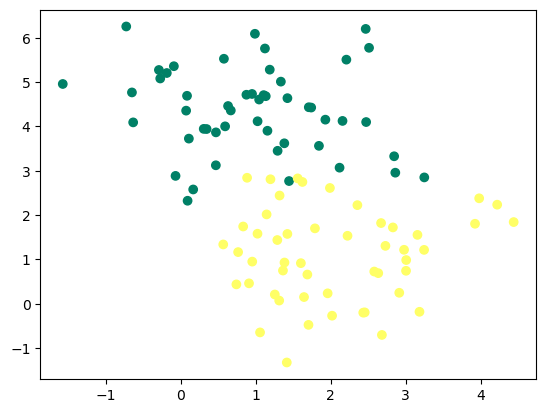

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs	

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X :', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter (X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

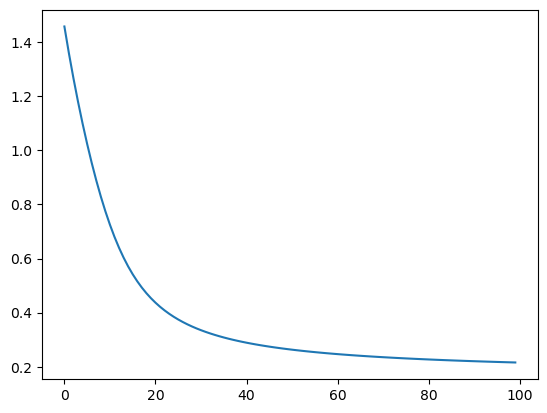

In [14]:
model = artificial_neuron()
model.fit (X, y)
model.display_loss()